# Basic python: Assignment 2

In this assignment, you will load a physiological signal (your own breathing!) and plot it. The signal will be noisy, so you will have to do a bit of signal processing on it. Most of the difficult stuff will be done using the excellent library numpy.

## Task 1
You should have a file containing your respiration data, load it into python using the numpy.loadtxt function.

## Task 2
Now you have your data, try plotting it. Try some of the different plotting options

## Task 3
The data is probably quite noisy; to remove the noise convolve the signal with a filter function (using numpy.convolve). Have a look in the PythonBasics notebook to find some implementations of filter functions.

## Task 4
Try to write a function that identifies the peaks in your signal. 

## Task 5
Plot your original data along with the smoothed data and markers identifying the locations of peaks. Make sure:
- Your axes are labeled
- There is a legend
- You can see all the plot lines.

Save the figure to disk in a .png format image.

# Task 1
Read in the .csv file containing the physiological signal

In [120]:
# Import numpy - I reccomend shortening it to np
import numpy as np

# Load your physiological data - you can use the numpy loadtxt function
mydata = np.loadtxt("files/DanBreathing.csv", dtype='float', delimiter=",")

# make sure the data is all there - check the shape of the loaded data
mydata.shape

(2, 1455)

# Task 2
Plot the data. Your data should have a shape (2, N) where N is the number of samples taken. You can use the sample number directly in your plot, or convert it to a number of seconds since starting the data acquisition if you like.

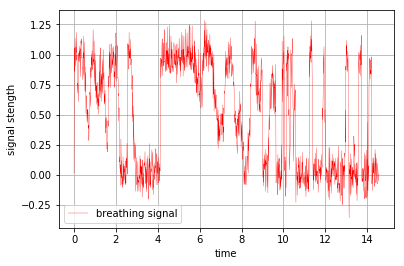

In [121]:
# Set up the plotting - the line starting with % is a notebook specific thing
% matplotlib inline
import matplotlib.pyplot as plt

# Plot your data
plt.plot(mydata[0],mydata[1], linewidth=0.3, color='red', label="breathing signal")
# Try changing the line colour, thickness, style. Try adding a legend.

# Don't forget to label your axes!
plt.xlabel('time')
plt.ylabel('signal stength')
plt.legend()
plt.grid()

plt.show()

# Task 3
Use the moving average filter and the numpy.convolve function to remove some of the noise you see in the data. Plot the filtered signal. 

Try using different filter functions to see which is best.

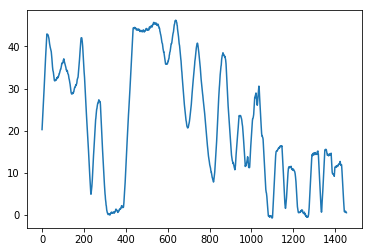

In [122]:
# Define your filter function (see the python basics notebook for implementation):
def movingAverage(dataset, div): # This is a valid function that does nothing. You need to implement it!
    N = dataset.shape[1]/div # Try changing the window width to see the effect on the filtered signal
    window = np.ones(int(N))
    return window

# Use numpy.convolve to filter the original signal

filteredSignal_A = np.convolve(movingAverage(mydata,32),mydata[1],mode='same') # Fill in the details.

# Plot the filtered signal
plt.plot(filteredSignal_A)
plt.show()

# Now try fiddling with:
def hammingWindow(dataset, div):
    N = dataset.shape[1]/div
    HW = np.array([2.0*np.pi*i/(int(N)-1) for i in range(0, int(N))])
    return HW/HW.sum()

filteredSignal_B = np.convolve(hammingWindow(mydata,32),mydata[1], mode='same')

def sinWindow(dataset, div):
    N = dataset.shape[1]/div
    SW = np.sin(np.array([np.pi*i / (int(N)-1) for i in range(0, int(N))]))
    return SW

filteredSignal_C = np.convolve(sinWindow(mydata,16),mydata[1], mode='same')
                   


# - the filter function you use
# - the settings in numpy.convolve


<function matplotlib.pyplot.show>

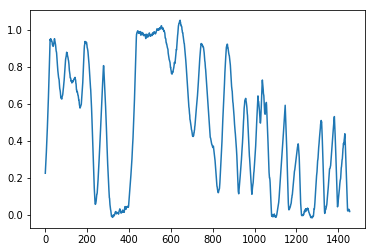

In [123]:
plt.plot(filteredSignal_B)
plt.show

<function matplotlib.pyplot.show>

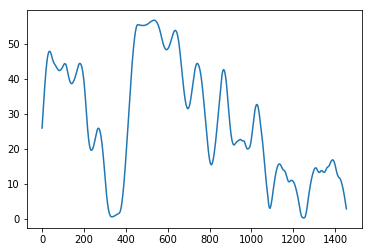

In [124]:
plt.plot(filteredSignal_C)
plt.show

# Task 4
Write a function to detect the peaks in your data. There is an implementation in PythonBasics.ipynb.

Try to write the function without looking at the reference version. Remember that:
- There is probably more than one peak.
- Thresholding the signal will make it a lot easier.
- To be able to plot the peak later, you will need the x and y positions.



[[5.60000000e+01 9.53866636e-01]
 [5.70000000e+01 9.53866636e-01]
 [5.80000000e+01 9.53866636e-01]
 [5.90000000e+01 9.53866636e-01]
 [6.00000000e+01 9.53866636e-01]
 [6.10000000e+01 9.53866636e-01]
 [6.20000000e+01 9.53866636e-01]
 [6.30000000e+01 9.53866636e-01]
 [6.40000000e+01 9.53866636e-01]
 [6.50000000e+01 9.53866636e-01]
 [6.60000000e+01 9.53866636e-01]
 [6.70000000e+01 9.53866636e-01]
 [6.80000000e+01 9.53866636e-01]
 [6.90000000e+01 9.53866636e-01]
 [7.00000000e+01 9.53866636e-01]
 [7.10000000e+01 9.53866636e-01]
 [7.20000000e+01 9.53866636e-01]
 [7.30000000e+01 9.53866636e-01]
 [7.40000000e+01 9.53866636e-01]
 [7.50000000e+01 9.53866636e-01]
 [7.70000000e+01 9.53866636e-01]
 [8.00000000e+01 9.53866636e-01]
 [8.10000000e+01 9.53866636e-01]
 [8.20000000e+01 9.53866636e-01]
 [8.30000000e+01 9.53866636e-01]
 [8.40000000e+01 9.53866636e-01]
 [8.50000000e+01 9.53866636e-01]
 [8.60000000e+01 9.53866636e-01]
 [8.70000000e+01 9.53866636e-01]
 [8.80000000e+01 9.53866636e-01]
 [8.900000

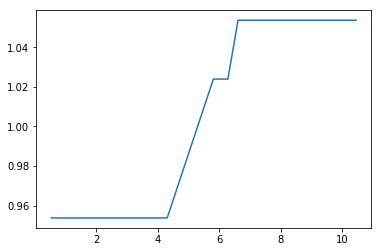

In [134]:
# Fill in the details of this function!
def peakDetect(dataset, thresholdFrac, deltaFrac, convolvedData=False):
    maxtab = []
    mx =-np.inf
    mxpos = np.nan
    
    threshold = thresholdFrac * np.max(dataset[1,:])
    delta = deltaFrac #* np.max(yData)

    for i in np.arange(len(dataset[1,:])):
        this = dataset[1,i]

        if this < threshold:# Skip points below the threshold
            continue

        if this > mx:
            mx = this
            mxpos = dataset[0,i]# This position is greater than the previous max, so might be a peak!

        if this < mx-delta:# Make sure we are larger than the peak by some amount
            if not (mxpos, mx) in maxtab:
                maxtab.append((i, mx))# If we haven't already, record this peak
   # if convolvedData:
       # return (maxtab, yDataConvolved)
    return maxtab

peakindex = np.array(peakDetect(np.vstack((mydata[0],filteredSignal_B)),0.6,0.1,False))
print(peakindex)

plt.plot(mydata[0, peakindex[:,0].astype(np.int64)],peakindex[:,1])

print(filteredSignal_B.shape)
print(mydata.shape)

# Maybe do a bit of testing code here

# Task 5
Bring all the previous data together - plot your original signal alongside the filtered signal. Use your peak detection function to mark the peaks in the data. In your plot, make sure:
- All lines are clearly visible.
- The markers for the peaks are clearly visible.
- There is a legend.
- The axes are labelled.

(NB: to do some of these, you may have to play with the figure size!)

If you like, you could write some more code to calculate the breathing frequency from this data.

In [126]:
# The plotting library should already be imported, so you can jump straight to implementing the plotting in this task!